In [1]:
%matplotlib inline

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


加载数据集

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

加载数据集会返回 4 个 NumPy 数组：

train_images 和 train_labels 数组是训练集，即模型用于学习的数据。
测试集 test_images 和 test_labels 数组用于测试模型。
图像为 28x28 的 NumPy 数组，像素值介于 0 到 255 之间。标签是整数数组，介于 0 到 9 之间。这些标签对应于图像代表的服饰所属的类别：
每张图像都映射到一个标签。由于数据集中不包含类别名称，因此将它们存储在此处，以便稍后在绘制图像表时使用：

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

查看一下数据的格式

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

预处理数据

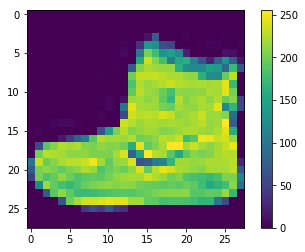

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

我们将这些数据归一化处理。最简单的方式就是都除以255。

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

显示训练集中的前 25 张图像，并在每张图像下显示类别名称。验证确保数据格式正确无误，然后我们就可以开始构建和训练网络了。

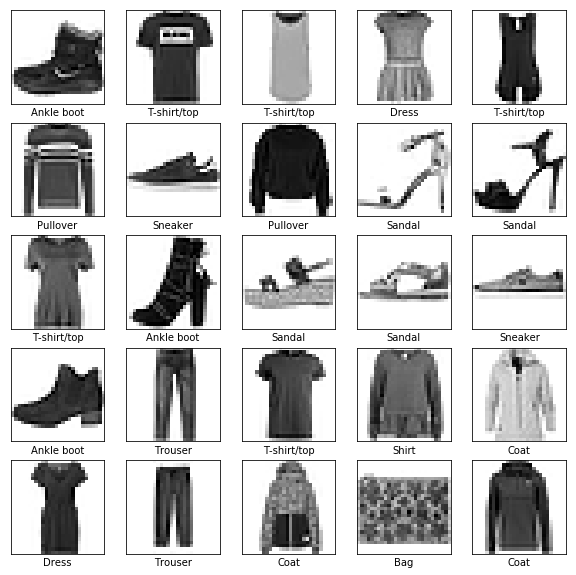

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

可以发现这个标签没什么问题，接下来就构建模型。

设置层
神经网络的基本构造块是层。层从馈送到其中的数据中提取表示结果。希望这些表示结果有助于解决手头问题。

大部分深度学习都会把简单的层连在一起。大部分层（例如 tf.keras.layers.Dense）都具有在训练期间要学习的参数。

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

编译模型
模型还需要再进行几项设置才可以开始训练。这些设置会添加到模型的编译步骤：

损失函数 - 衡量模型在训练期间的准确率。我们希望尽可能缩小该函数，以“引导”模型朝着正确的方向优化。
优化器 - 根据模型看到的数据及其损失函数更新模型的方式。
指标 - 用于监控训练和测试步骤。以下示例使用准确率，即图像被正确分类的比例。

In [14]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

训练模型
训练神经网络模型需要执行以下步骤：

将训练数据馈送到模型中，在本示例中为 train_images 和 train_labels 数组。
模型学习将图像与标签相关联。
我们要求模型对测试集进行预测，在本示例中为 test_images 数组。我们会验证预测结果是否与 test_labels 数组中的标签一致。
要开始训练，请调用 model.fit 方法，使模型与训练数据“拟合”：

In [15]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.4960 - acc: 0.8272
Epoch 2/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.3738 - acc: 0.8664
Epoch 3/5
60000/60000 [==============================] - 6s 93us/step - loss: 0.3362 - acc: 0.8772
Epoch 4/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.3134 - acc: 0.8836
Epoch 5/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.2945 - acc: 0.8906


在模型训练期间，系统会显示损失和准确率指标。该模型在训练数据上的准确率达到 0.88（即 88%）。

评估准确率
接下来，比较一下模型在测试数据集上的表现：

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 62us/step
Test accuracy: 0.8713


结果表明，模型在测试数据集上的准确率略低于在训练数据集上的准确率，效果还是很不错的。训练准确率和测试准确率之间的这种差异表示出现过拟合。如果机器学习模型在新数据上的表现不如在训练数据上的表现，就表示出现过拟合。

做出预测
模型经过训练后，我们可以使用它对一些图像进行预测。

In [17]:
predictions = model.predict(test_images)

在本示例中，模型已经预测了测试集中每张图像的标签。我们来看看第一个预测：

In [18]:
predictions[0]

array([1.2129763e-05, 1.4397679e-07, 2.3759546e-07, 5.4622906e-09,
       2.2822883e-06, 1.5731459e-02, 1.9444283e-06, 1.8067410e-02,
       5.1404650e-06, 9.6617913e-01], dtype=float32)

预测结果是一个具有 10 个数字的数组。这些数字说明模型对于图像对应于 10 种不同服饰中每一个服饰的“置信度”。我们可以看到哪个标签的置信度值最大：

In [19]:
np.argmax(predictions[0])

9

我们可以将该预测绘制成图来查看全部 10 个通道

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

我们来看看第 0 张图像、预测和预测数组。

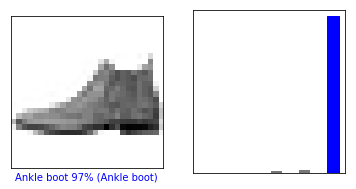

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

我们用它们的预测绘制几张图像。正确的预测标签为蓝色，错误的预测标签为红色。数字表示预测标签的百分比（总计为 100）。请注意，即使置信度非常高，也有可能预测错误。

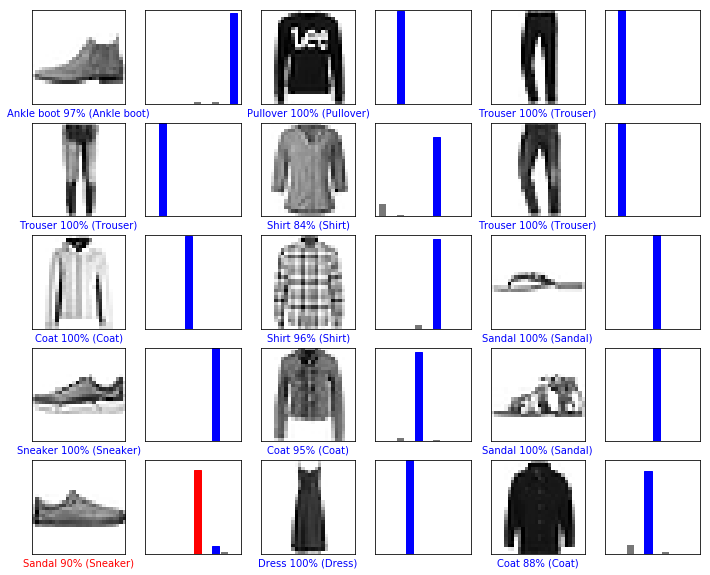

In [22]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

最后，使用经过训练的模型对单个图像进行预测

In [23]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


tf.keras 模型已经过优化，可以一次性对样本批次或样本集进行预测。因此，即使我们使用单个图像，仍需要将其添加到列表中：

In [24]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [25]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.2129763e-05 1.4397692e-07 2.3759546e-07 5.4622800e-09 2.2822906e-06
  1.5731459e-02 1.9444283e-06 1.8067420e-02 5.1404750e-06 9.6617913e-01]]


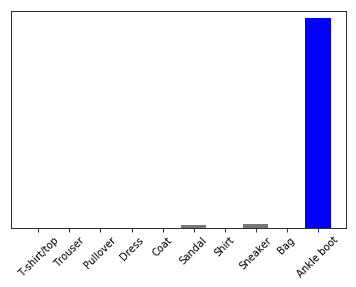

In [26]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [27]:
np.argmax(predictions_single[0])

9

和之前的结果一致